In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [21]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix, f1_score, recall_score,classification_report

In [22]:
df = pd.read_csv("BC.csv")

In [23]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [25]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [26]:
X = df[df.columns[1:]]
y = df["diagnosis"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (455, 30), (455,)
Test Data: (114, 30), (114,)


In [28]:
counter = Counter(y_train)
counter

Counter({0: 290, 1: 165})

In [29]:
upsample = SMOTE()
X_train, y_train = upsample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 290, 1: 290})


In [30]:
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (580, 30), (580,)
Test Data: (114, 30), (114,)


In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_train, log_reg.predict(X_train)))

0.9568965517241379


In [32]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9385964912280702


In [33]:
print(confusion_matrix(y_test, y_pred))

[[62  5]
 [ 2 45]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.90      0.96      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



Accuracy on Test Data: 98.24561403508771%
Precision Score: 0.9787234042553191
Recall Score: 0.9787234042553191
F1 Score: 0.9787234042553191


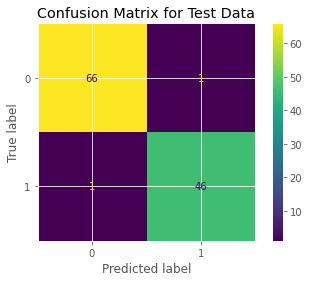


Accuracy on whole Data
Accuracy on Whole Data: 98.59402460456941%
Precision Score: 0.9857142857142858
Recall Score: 0.9764150943396226
F1 Score: 0.981042654028436


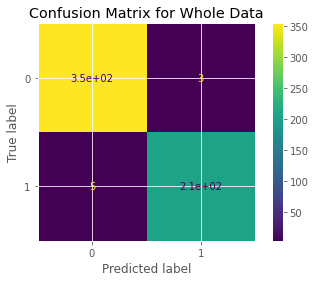

In [35]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(svm_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
print("Accuracy on whole Data")
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(svm_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [36]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       357
           1       0.99      0.98      0.98       212

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.99      0.99      0.99       569



Accuracy on Test Data: 95.6140350877193%
Precision Score: 0.9375
Recall Score: 0.9574468085106383
F1 Score: 0.9473684210526315


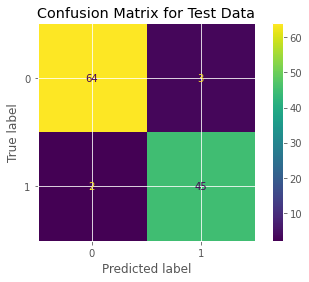

Accuracy on whole data
Accuracy on Whole Data: 99.12126537785588%
Precision Score: 0.9859154929577465
Recall Score: 0.9905660377358491
F1 Score: 0.9882352941176472


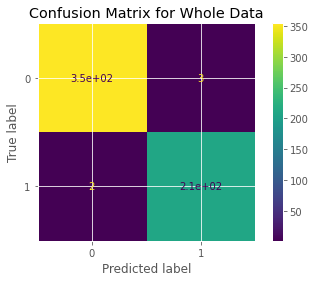

In [37]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(xgb_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

print("Accuracy on whole data")

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(xgb_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [38]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       357
           1       0.99      0.99      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



Accuracy on Test Data: 98.24561403508771%
Precision Score: 0.9787234042553191
Recall Score: 0.9787234042553191
F1 Score: 0.9787234042553191


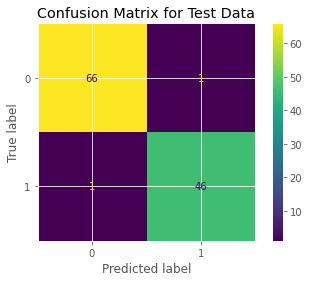


Accuracy on whole Data
Accuracy on Whole Data: 98.59402460456941%
Precision Score: 0.9857142857142858
Recall Score: 0.9764150943396226
F1 Score: 0.981042654028436


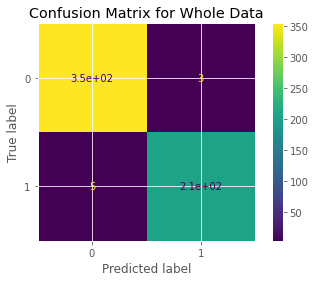

In [39]:
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
lr_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(svm_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
print("Accuracy on whole Data")
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(svm_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()